In [6]:
#%load_ext autoreload
#%autoreload 2


import sys
sys.path.append("../../mrf-sim/")
sys.path.append("../../epgpy/")
sys.path.append("../../machines/")
sys.path.append("../../mutools/")
sys.path.append("../../dicomstack/")


#import matplotlib
#matplotlib.u<se("TkAgg")
from mrfsim import T1MRF
from image_series import *
from dictoptimizers import SimpleDictSearch
from utils_mrf import *

import json
import readTwix as rT
import time
import os
from numpy.lib.format import open_memmap
from numpy import memmap
import pickle
from scipy.io import loadmat,savemat
import twixtools
from mutools import io
import cv2
import scipy
%matplotlib inline

import numpy as np


Could not import cupy
Could not import SPIJN


In [8]:
base_folder = "../data/InVivo/3D"
localfile="/phantom.006.v1/meas_MID00023_FID02830_raFin_3D_tra_1x1x5mm_FULL_FF_TR5000.dat"#Box at the top border with more outside

filename = base_folder+localfile

#filename="./data/InVivo/3D/20211221_EV_MRF/meas_MID00043_FID42065_raFin_3D_tra_1x1x5mm_us2_vivo.dat"
#filename="./data/InVivo/3D/20211119_EV_MRF/meas_MID00043_FID42065_raFin_3D_tra_1x1x5mm_us2_vivo.dat"
#filename="./data/InVivo/3D/20211119_EV_MRF/meas_MID00043_FID42065_raFin_3D_tra_1x1x5mm_us2_vivo.dat"

filename_save=str.split(filename,".dat") [0]+".npy"
#filename_nav_save=str.split(base_folder+"/phantom.001.v1/phantom.001.v1.dat",".dat") [0]+"_nav.npy"
filename_nav_save=str.split(filename,".dat") [0]+"_nav.npy"

folder = "/".join(str.split(filename,"/")[:-1])



suffix=""
low_freq_encode_corrected_perc=None
if low_freq_encode_corrected_perc is not None:
    suffix+="_{}".format("_".join(str.split(str(low_freq_encode_corrected_perc),".")))

filename_b1 = str.split(filename,".dat") [0]+"_b1{}.npy".format("")
filename_seqParams = str.split(filename,".dat") [0]+"_seqParams.pkl"

filename_volume = str.split(filename,".dat") [0]+"_volumes{}.npy".format(suffix)
filename_volume_corrected = str.split(filename,".dat") [0]+"_volumes_corrected{}.npy".format(suffix)
filename_kdata = str.split(filename,".dat") [0]+"_kdata{}.npy".format("")
filename_mask= str.split(filename,".dat") [0]+"_mask{}.npy".format("")
filename_oop=str.split(filename,".dat") [0]+"_volumes_oop{}.npy".format(suffix)
filename_oop_corrected=str.split(filename,".dat") [0]+"_volumes_oop_corrected{}.npy".format(suffix)


#filename="./data/InVivo/Phantom20211028/meas_MID00028_FID39712_JAMBES_raFin_CLI.dat"

density_adj_radial=True
use_GPU = True
light_memory_usage=True

In [9]:
kdata_all_channels_all_slices = np.load(filename_kdata)


In [17]:
b1_all_slices=np.load(filename_b1)

In [11]:
kdata_all_channels_all_slices.shape

(34, 144, 20, 800)

In [21]:
incoherent=True
mode="old"
nb_channels=kdata_all_channels_all_slices.shape[0]
nb_allspokes=kdata_all_channels_all_slices.shape[1]
nb_slices=kdata_all_channels_all_slices.shape[2]
npoint=kdata_all_channels_all_slices.shape[3]
undersampling_factor=1
image_size=(nb_slices,int(npoint/2),int(npoint/2))

In [16]:
radial_traj=Radial3D(total_nspokes=nb_allspokes,undersampling_factor=undersampling_factor,npoint=npoint,nb_slices=nb_slices,incoherent=incoherent,mode=mode)


In [18]:
volumes_dixon=[]
necho=3

In [22]:
curr_i=0
next_i=curr_i+int(nb_allspokes/3)
for i in range(necho):
    radial_traj_dixon=Radial3D(total_nspokes=int(nb_allspokes/3),undersampling_factor=undersampling_factor,npoint=npoint,nb_slices=nb_slices,incoherent=incoherent,mode=mode)
    radial_traj_dixon.traj = radial_traj.get_traj()[curr_i:next_i]
    volume_dixon=simulate_radial_undersampled_images_multi(kdata_all_channels_all_slices[:,curr_i:next_i,:,:],radial_traj_dixon,image_size,b1=b1_all_slices,density_adj=False,ntimesteps=1,useGPU=False,normalize_kdata=False,memmap_file=None,light_memory_usage=True,normalize_volumes=True)
    curr_i=next_i
    next_i=curr_i+int(nb_allspokes/3)
    volumes_dixon.append(volume_dixon)

 47%|███████████████████▊                      | 16/34 [00:00<00:00, 155.81it/s]

(768000, 3)
float32


100%|██████████████████████████████████████████| 34/34 [00:00<00:00, 160.65it/s]
0it [00:00, ?it/s]
  0%|                                                    | 0/34 [00:00<?, ?it/s]

Performing NUFFT
(768000, 3)
(768000,)



  3%|█▎                                          | 1/34 [00:00<00:11,  2.80it/s]

(768000, 3)
(768000,)



  6%|██▌                                         | 2/34 [00:00<00:11,  2.85it/s]

(768000, 3)
(768000,)



  9%|███▉                                        | 3/34 [00:01<00:10,  2.87it/s]

(768000, 3)
(768000,)



 12%|█████▏                                      | 4/34 [00:01<00:09,  3.02it/s]

(768000, 3)
(768000,)



 15%|██████▍                                     | 5/34 [00:01<00:09,  3.04it/s]

(768000, 3)
(768000,)



 18%|███████▊                                    | 6/34 [00:01<00:09,  3.07it/s]

(768000, 3)
(768000,)



 21%|█████████                                   | 7/34 [00:02<00:08,  3.00it/s]

(768000, 3)
(768000,)



 24%|██████████▎                                 | 8/34 [00:02<00:08,  3.07it/s]

(768000, 3)
(768000,)



 26%|███████████▋                                | 9/34 [00:02<00:08,  3.04it/s]

(768000, 3)
(768000,)



 29%|████████████▋                              | 10/34 [00:03<00:07,  3.09it/s]

(768000, 3)
(768000,)



 32%|█████████████▉                             | 11/34 [00:03<00:07,  3.15it/s]

(768000, 3)
(768000,)



 35%|███████████████▏                           | 12/34 [00:03<00:07,  3.13it/s]

(768000, 3)
(768000,)



 38%|████████████████▍                          | 13/34 [00:04<00:06,  3.13it/s]

(768000, 3)
(768000,)



 41%|█████████████████▋                         | 14/34 [00:04<00:06,  3.19it/s]

(768000, 3)
(768000,)



 44%|██████████████████▉                        | 15/34 [00:04<00:05,  3.18it/s]

(768000, 3)
(768000,)



 47%|████████████████████▏                      | 16/34 [00:05<00:05,  3.12it/s]

(768000, 3)
(768000,)



 50%|█████████████████████▌                     | 17/34 [00:05<00:05,  3.07it/s]

(768000, 3)
(768000,)



 53%|██████████████████████▊                    | 18/34 [00:05<00:05,  3.05it/s]

(768000, 3)
(768000,)



 56%|████████████████████████                   | 19/34 [00:06<00:04,  3.11it/s]

(768000, 3)
(768000,)



 59%|█████████████████████████▎                 | 20/34 [00:06<00:04,  3.14it/s]

(768000, 3)
(768000,)



 62%|██████████████████████████▌                | 21/34 [00:06<00:04,  3.14it/s]

(768000, 3)
(768000,)



 65%|███████████████████████████▊               | 22/34 [00:07<00:03,  3.15it/s]

(768000, 3)
(768000,)



 68%|█████████████████████████████              | 23/34 [00:07<00:03,  3.14it/s]

(768000, 3)
(768000,)



 71%|██████████████████████████████▎            | 24/34 [00:07<00:03,  3.12it/s]

(768000, 3)
(768000,)



 74%|███████████████████████████████▌           | 25/34 [00:08<00:02,  3.20it/s]

(768000, 3)
(768000,)



 76%|████████████████████████████████▉          | 26/34 [00:08<00:02,  3.22it/s]

(768000, 3)
(768000,)



 79%|██████████████████████████████████▏        | 27/34 [00:08<00:02,  3.25it/s]

(768000, 3)
(768000,)



 82%|███████████████████████████████████▍       | 28/34 [00:08<00:01,  3.24it/s]

(768000, 3)
(768000,)



 85%|████████████████████████████████████▋      | 29/34 [00:09<00:01,  3.22it/s]

(768000, 3)
(768000,)



 88%|█████████████████████████████████████▉     | 30/34 [00:09<00:01,  3.23it/s]

(768000, 3)
(768000,)



 91%|███████████████████████████████████████▏   | 31/34 [00:09<00:00,  3.21it/s]

(768000, 3)
(768000,)



 94%|████████████████████████████████████████▍  | 32/34 [00:10<00:00,  3.21it/s]

(768000, 3)
(768000,)



 97%|█████████████████████████████████████████▋ | 33/34 [00:10<00:00,  3.21it/s]

(768000, 3)
(768000,)



100%|███████████████████████████████████████████| 34/34 [00:10<00:00,  3.13it/s]
1it [00:10, 10.86s/it]


Normalizing by Coil Sensi


 50%|█████████████████████                     | 17/34 [00:00<00:00, 161.70it/s]

(768000, 3)
float32


100%|██████████████████████████████████████████| 34/34 [00:00<00:00, 164.37it/s]
0it [00:00, ?it/s]
  0%|                                                    | 0/34 [00:00<?, ?it/s]

Performing NUFFT
(768000, 3)
(768000,)



  3%|█▎                                          | 1/34 [00:00<00:08,  3.86it/s]

(768000, 3)
(768000,)



  6%|██▌                                         | 2/34 [00:00<00:08,  3.76it/s]

(768000, 3)
(768000,)



  9%|███▉                                        | 3/34 [00:00<00:08,  3.63it/s]

(768000, 3)
(768000,)



 12%|█████▏                                      | 4/34 [00:01<00:08,  3.62it/s]

(768000, 3)
(768000,)



 15%|██████▍                                     | 5/34 [00:01<00:08,  3.62it/s]

(768000, 3)
(768000,)



 18%|███████▊                                    | 6/34 [00:01<00:07,  3.62it/s]

(768000, 3)
(768000,)



 21%|█████████                                   | 7/34 [00:01<00:07,  3.64it/s]

(768000, 3)
(768000,)



 24%|██████████▎                                 | 8/34 [00:02<00:07,  3.56it/s]

(768000, 3)
(768000,)



 26%|███████████▋                                | 9/34 [00:02<00:07,  3.51it/s]

(768000, 3)
(768000,)



 29%|████████████▋                              | 10/34 [00:02<00:06,  3.44it/s]

(768000, 3)
(768000,)



 32%|█████████████▉                             | 11/34 [00:03<00:06,  3.41it/s]

(768000, 3)
(768000,)



 35%|███████████████▏                           | 12/34 [00:03<00:06,  3.40it/s]

(768000, 3)
(768000,)



 38%|████████████████▍                          | 13/34 [00:03<00:06,  3.37it/s]

(768000, 3)
(768000,)



 41%|█████████████████▋                         | 14/34 [00:04<00:05,  3.35it/s]

(768000, 3)
(768000,)



 44%|██████████████████▉                        | 15/34 [00:04<00:05,  3.34it/s]

(768000, 3)
(768000,)



 47%|████████████████████▏                      | 16/34 [00:04<00:05,  3.25it/s]

(768000, 3)
(768000,)



 50%|█████████████████████▌                     | 17/34 [00:04<00:05,  3.24it/s]

(768000, 3)
(768000,)



 53%|██████████████████████▊                    | 18/34 [00:05<00:04,  3.24it/s]

(768000, 3)
(768000,)



 56%|████████████████████████                   | 19/34 [00:05<00:04,  3.27it/s]

(768000, 3)
(768000,)



 59%|█████████████████████████▎                 | 20/34 [00:05<00:04,  3.28it/s]

(768000, 3)
(768000,)



 62%|██████████████████████████▌                | 21/34 [00:06<00:03,  3.28it/s]

(768000, 3)
(768000,)



 65%|███████████████████████████▊               | 22/34 [00:06<00:03,  3.30it/s]

(768000, 3)
(768000,)



 68%|█████████████████████████████              | 23/34 [00:06<00:03,  3.27it/s]

(768000, 3)
(768000,)



 71%|██████████████████████████████▎            | 24/34 [00:07<00:03,  3.29it/s]

(768000, 3)
(768000,)



 74%|███████████████████████████████▌           | 25/34 [00:07<00:02,  3.27it/s]

(768000, 3)
(768000,)



 76%|████████████████████████████████▉          | 26/34 [00:07<00:02,  3.22it/s]

(768000, 3)
(768000,)



 79%|██████████████████████████████████▏        | 27/34 [00:08<00:02,  3.25it/s]

(768000, 3)
(768000,)



 82%|███████████████████████████████████▍       | 28/34 [00:08<00:01,  3.23it/s]

(768000, 3)
(768000,)



 85%|████████████████████████████████████▋      | 29/34 [00:08<00:01,  3.28it/s]

(768000, 3)
(768000,)



 88%|█████████████████████████████████████▉     | 30/34 [00:08<00:01,  3.29it/s]

(768000, 3)
(768000,)



 91%|███████████████████████████████████████▏   | 31/34 [00:09<00:00,  3.29it/s]

(768000, 3)
(768000,)



 94%|████████████████████████████████████████▍  | 32/34 [00:09<00:00,  3.31it/s]

(768000, 3)
(768000,)



 97%|█████████████████████████████████████████▋ | 33/34 [00:09<00:00,  3.31it/s]

(768000, 3)
(768000,)



100%|███████████████████████████████████████████| 34/34 [00:10<00:00,  3.36it/s]
1it [00:10, 10.13s/it]


Normalizing by Coil Sensi


 50%|█████████████████████                     | 17/34 [00:00<00:00, 162.43it/s]

(768000, 3)
float32


100%|██████████████████████████████████████████| 34/34 [00:00<00:00, 165.00it/s]
0it [00:00, ?it/s]
  0%|                                                    | 0/34 [00:00<?, ?it/s]

Performing NUFFT
(768000, 3)
(768000,)



  3%|█▎                                          | 1/34 [00:00<00:08,  3.88it/s]

(768000, 3)
(768000,)



  6%|██▌                                         | 2/34 [00:00<00:08,  3.70it/s]

(768000, 3)
(768000,)



  9%|███▉                                        | 3/34 [00:00<00:08,  3.62it/s]

(768000, 3)
(768000,)



 12%|█████▏                                      | 4/34 [00:01<00:08,  3.65it/s]

(768000, 3)
(768000,)



 15%|██████▍                                     | 5/34 [00:01<00:08,  3.62it/s]

(768000, 3)
(768000,)



 18%|███████▊                                    | 6/34 [00:01<00:07,  3.63it/s]

(768000, 3)
(768000,)



 21%|█████████                                   | 7/34 [00:01<00:07,  3.57it/s]

(768000, 3)
(768000,)



 24%|██████████▎                                 | 8/34 [00:02<00:07,  3.52it/s]

(768000, 3)
(768000,)



 26%|███████████▋                                | 9/34 [00:02<00:07,  3.52it/s]

(768000, 3)
(768000,)



 29%|████████████▋                              | 10/34 [00:02<00:06,  3.46it/s]

(768000, 3)
(768000,)



 32%|█████████████▉                             | 11/34 [00:03<00:06,  3.41it/s]

(768000, 3)
(768000,)



 35%|███████████████▏                           | 12/34 [00:03<00:06,  3.31it/s]

(768000, 3)
(768000,)



 38%|████████████████▍                          | 13/34 [00:03<00:06,  3.27it/s]

(768000, 3)
(768000,)



 41%|█████████████████▋                         | 14/34 [00:04<00:06,  3.28it/s]

(768000, 3)
(768000,)



 44%|██████████████████▉                        | 15/34 [00:04<00:05,  3.25it/s]

(768000, 3)
(768000,)



 47%|████████████████████▏                      | 16/34 [00:04<00:05,  3.21it/s]

(768000, 3)
(768000,)



 50%|█████████████████████▌                     | 17/34 [00:05<00:05,  3.20it/s]

(768000, 3)
(768000,)



 53%|██████████████████████▊                    | 18/34 [00:05<00:05,  3.19it/s]

(768000, 3)
(768000,)



 56%|████████████████████████                   | 19/34 [00:05<00:04,  3.22it/s]

(768000, 3)
(768000,)



 59%|█████████████████████████▎                 | 20/34 [00:05<00:04,  3.26it/s]

(768000, 3)
(768000,)



 62%|██████████████████████████▌                | 21/34 [00:06<00:03,  3.27it/s]

(768000, 3)
(768000,)



 65%|███████████████████████████▊               | 22/34 [00:06<00:03,  3.23it/s]

(768000, 3)
(768000,)



 68%|█████████████████████████████              | 23/34 [00:06<00:03,  3.21it/s]

(768000, 3)
(768000,)



 71%|██████████████████████████████▎            | 24/34 [00:07<00:03,  3.23it/s]

(768000, 3)
(768000,)



 74%|███████████████████████████████▌           | 25/34 [00:07<00:02,  3.24it/s]

(768000, 3)
(768000,)



 76%|████████████████████████████████▉          | 26/34 [00:07<00:02,  3.23it/s]

(768000, 3)
(768000,)



 79%|██████████████████████████████████▏        | 27/34 [00:08<00:02,  3.21it/s]

(768000, 3)
(768000,)



 82%|███████████████████████████████████▍       | 28/34 [00:08<00:01,  3.22it/s]

(768000, 3)
(768000,)



 85%|████████████████████████████████████▋      | 29/34 [00:08<00:01,  3.26it/s]

(768000, 3)
(768000,)



 88%|█████████████████████████████████████▉     | 30/34 [00:09<00:01,  3.26it/s]

(768000, 3)
(768000,)



 91%|███████████████████████████████████████▏   | 31/34 [00:09<00:00,  3.28it/s]

(768000, 3)
(768000,)



 94%|████████████████████████████████████████▍  | 32/34 [00:09<00:00,  3.27it/s]

(768000, 3)
(768000,)



 97%|█████████████████████████████████████████▋ | 33/34 [00:09<00:00,  3.27it/s]

(768000, 3)
(768000,)



100%|███████████████████████████████████████████| 34/34 [00:10<00:00,  3.32it/s]
1it [00:10, 10.25s/it]


Normalizing by Coil Sensi


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 45.63it/s]


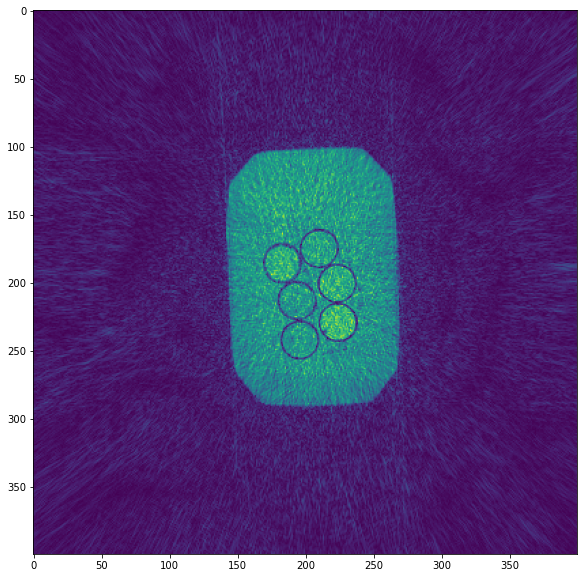

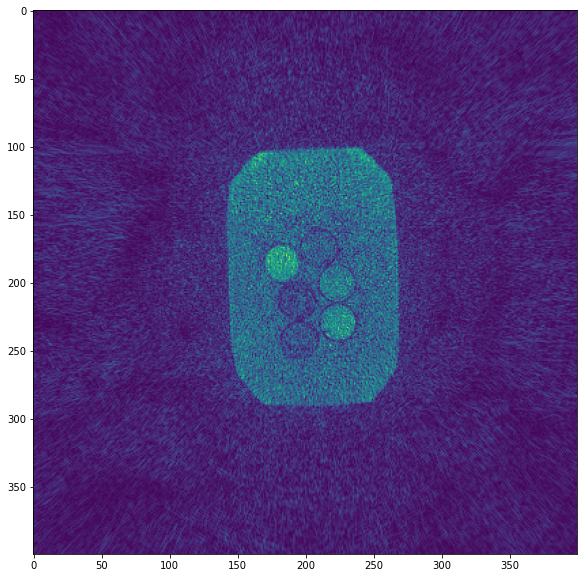

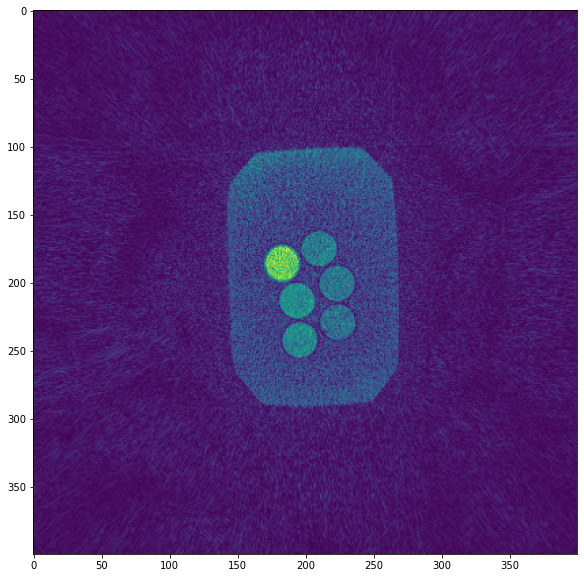

In [25]:
volumes_dixon=np.squeeze(np.array(volumes_dixon))
sl=int(nb_slices/2)

for i in range(necho):
    plt.figure(figsize=(10,10))
    plt.imshow(np.abs(volumes_dixon[i,sl]))

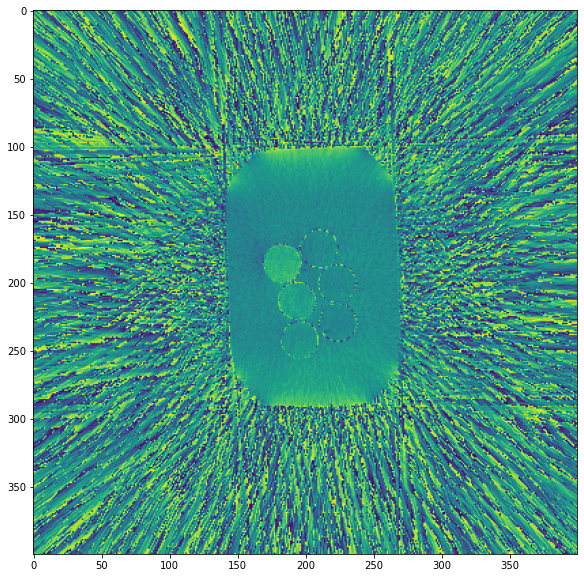

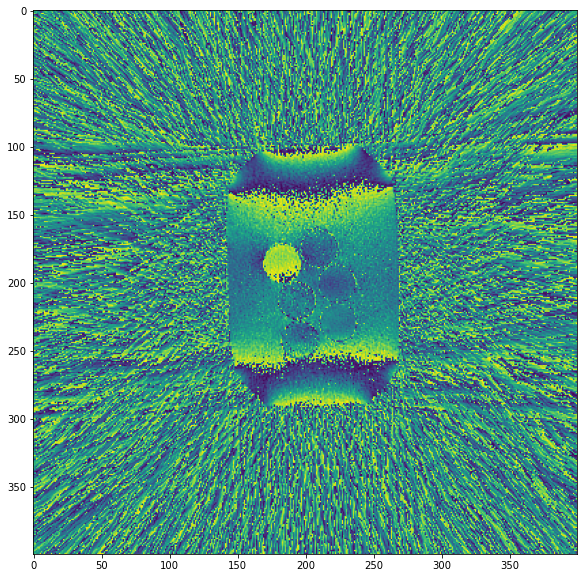

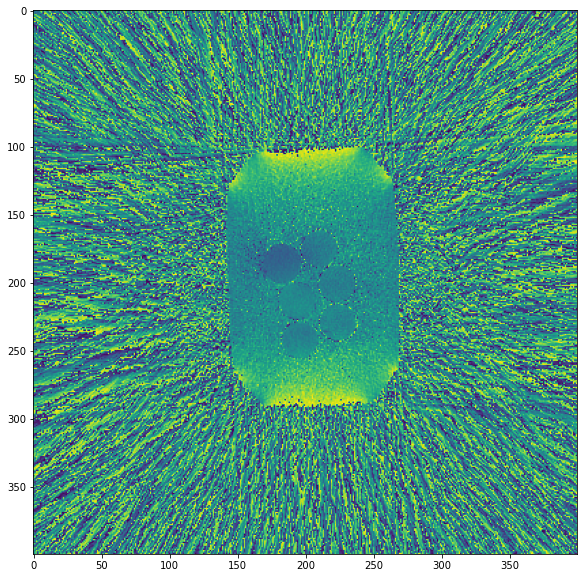

In [26]:
volumes_dixon=np.squeeze(np.array(volumes_dixon))
sl=int(nb_slices/2)

for i in range(necho):
    plt.figure(figsize=(10,10))
    plt.imshow(np.angle(volumes_dixon[i,sl]))

In [ ]:
TEs = [2.2,5.81,3.29]
psi_0=0
